In [400]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import kernel_ridge
from scipy.stats import logistic

## Import Data Set

In [2]:
# Get naive and actual occupancy percentage data
X_data = pd.read_csv('X_data.csv')
X_data = np.array(X_data.values.tolist())
X_data = X_data[:,3]
print('Naive occupancy')
print(X_data[0:10])

Y_data = pd.read_csv('Y_data.csv')
Y_data = np.array(Y_data.values.tolist())
Y_data = Y_data[:,1]
print('Actual occupancy')
print(Y_data[0:10])

Naive occupancy
[0.286 0.286 0.321 0.321 0.321 0.321 0.321 0.357 0.357 0.357]
Actual occupancy
[0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75]


In [3]:
# Group data to day snapshot
X_data = np.reshape(X_data, (84,720))
print('Naive occupancy')
print(X_data.shape)
print(X_data[0][:10])


Y_data = np.reshape(Y_data, (84,720))
print('Actual occupancy')
print(Y_data.shape)
print(Y_data[0][:10])

Naive occupancy
(84, 720)
[0.286 0.286 0.321 0.321 0.321 0.321 0.321 0.357 0.357 0.357]
Actual occupancy
(84, 720)
[0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75]


In [4]:
# Get block names label for each of X/Y data
block_names = pd.read_csv('block_names.csv')
block_names = np.array(block_names.iloc[:,1])
block_names = np.reshape(block_names, (12,7))
print(block_names[0])

['11TH AVE NE BETWEEN NE 47TH ST AND NE 50TH ST 2022/03/21'
 '11TH AVE NE BETWEEN NE 47TH ST AND NE 50TH ST 2022/03/22'
 '11TH AVE NE BETWEEN NE 47TH ST AND NE 50TH ST 2022/03/23'
 '11TH AVE NE BETWEEN NE 47TH ST AND NE 50TH ST 2022/03/24'
 '11TH AVE NE BETWEEN NE 47TH ST AND NE 50TH ST 2022/03/25'
 '11TH AVE NE BETWEEN NE 47TH ST AND NE 50TH ST 2022/03/26'
 '11TH AVE NE BETWEEN NE 47TH ST AND NE 50TH ST 2022/03/28']


In [6]:
# Group data into blocks
blocks_X = np.reshape(X_data, (12,7,720))
blocks_Y = np.reshape(Y_data, (12,7,720))
print(blocks_X[0,0,:10])
print(blocks_Y[0,0,:10])

[0.286 0.286 0.321 0.321 0.321 0.321 0.321 0.357 0.357 0.357]
[0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75]


## Correlated Blocks

In [22]:
def display(X, Y, name):
    time = np.arange(720)
    random_list = random.sample(range(0, len(Y)), 4)
    plt.figure(figsize=(16,10))
    for i in range(4):
        index = random_list[i]
        plt.subplot(2, 2, i+1)
        plt.plot(time, X[index], color='g', label='Naive')
        plt.plot(time, Y[index], color='b', label='Actual')
        plt.legend()
        plt.xlabel('Time (min since 8:00 am)')
        plt.xticks(np.arange(0,780,60))
        plt.ylabel('Occupancy Percentage')
        plt.title(name[index])

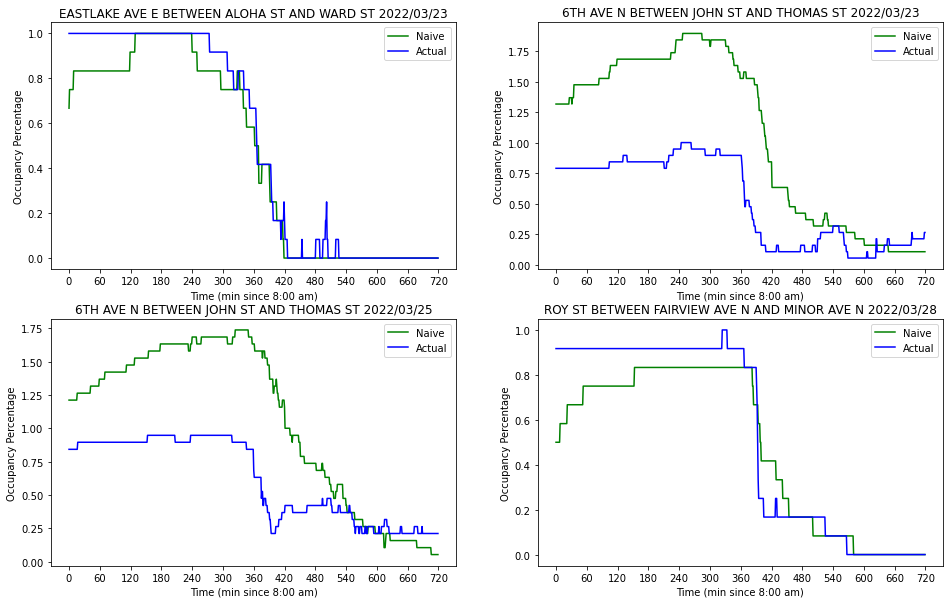

In [23]:
corr1_x = np.vstack((blocks_X[4], blocks_X[7], blocks_X[11]))
corr1_y = np.vstack((blocks_Y[4], blocks_Y[7], blocks_Y[11]))
corr1_name = np.concatenate((block_names[4], block_names[7], block_names[11]))
display(corr1_x, corr1_y, corr1_name)

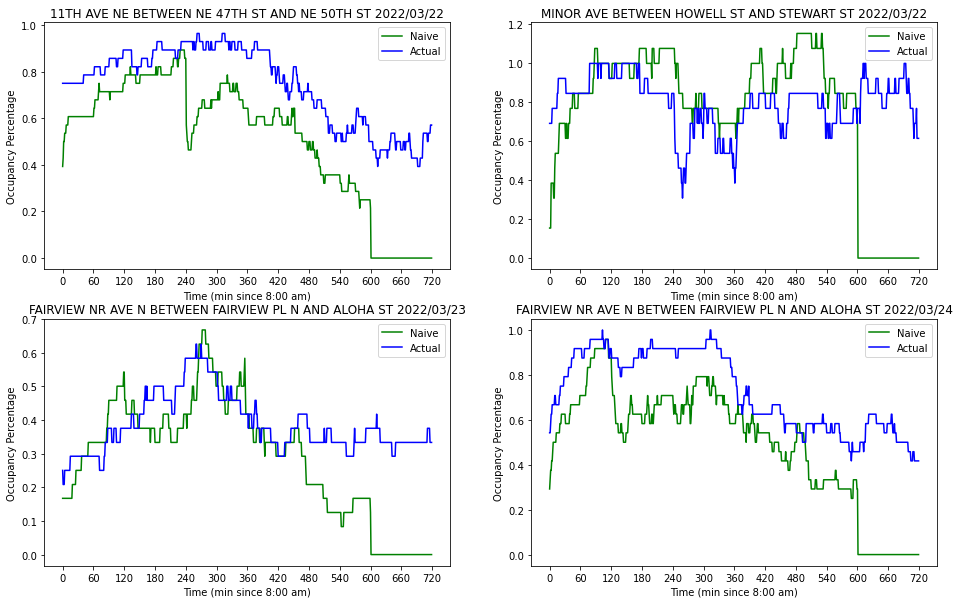

In [578]:
corr2_x = np.vstack((blocks_X[0], blocks_X[9], blocks_X[10]))
corr2_y = np.vstack((blocks_Y[0], blocks_Y[9], blocks_Y[10]))
corr2_name = np.concatenate((block_names[0], block_names[9], block_names[10]))
display(corr2_x, corr2_y, corr2_name)

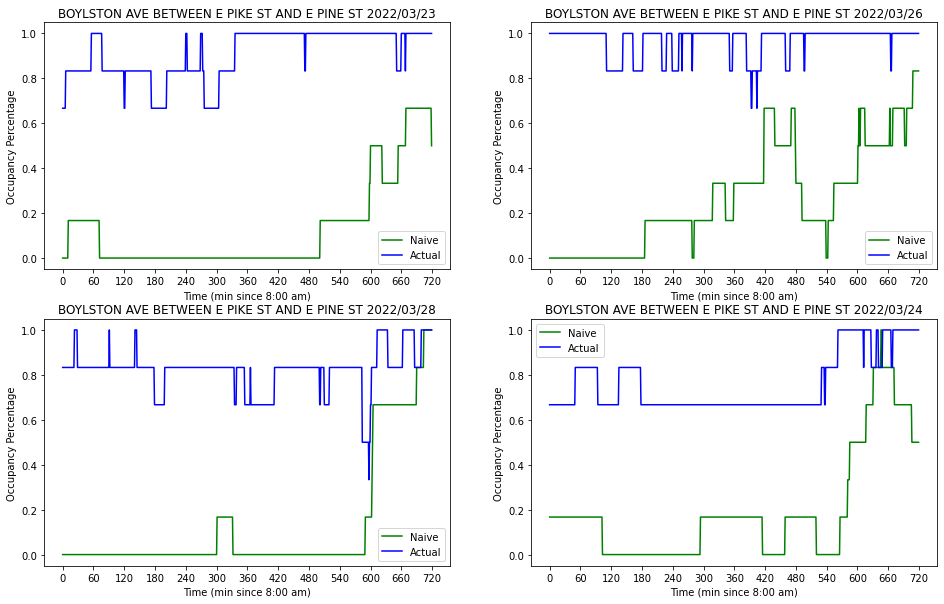

In [100]:
corr3_x = blocks_X[6]
corr3_y = blocks_Y[6]
corr3_name = block_names[6]
display(corr3_x, corr3_y, corr3_name)

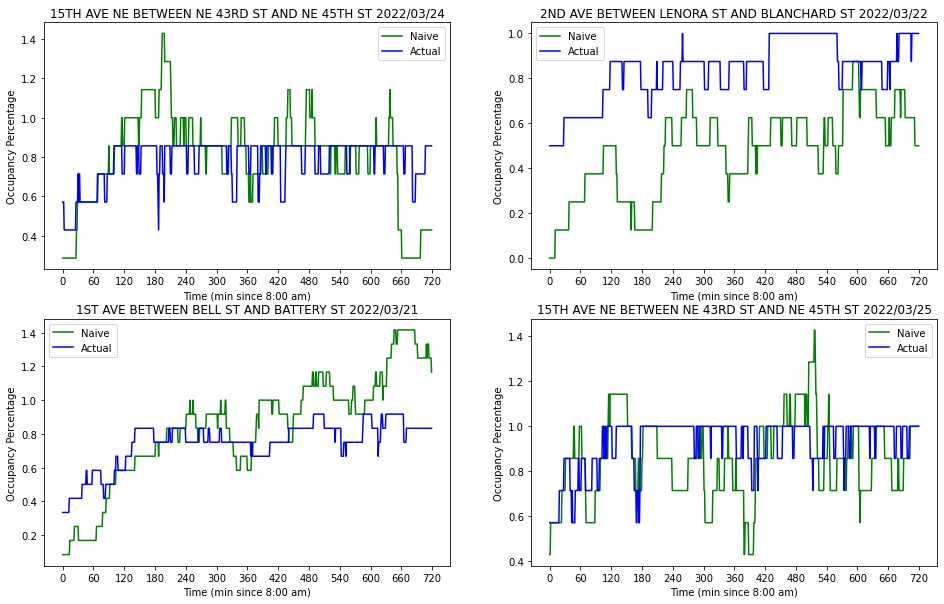

In [110]:
corr4_x = np.vstack((blocks_X[1], blocks_X[2], blocks_X[3]))
corr4_y = np.vstack((blocks_Y[1], blocks_Y[2], blocks_Y[3]))
corr4_name = np.concatenate((block_names[1], block_names[2], block_names[3]))
display(corr4_x, corr4_y, corr4_name)

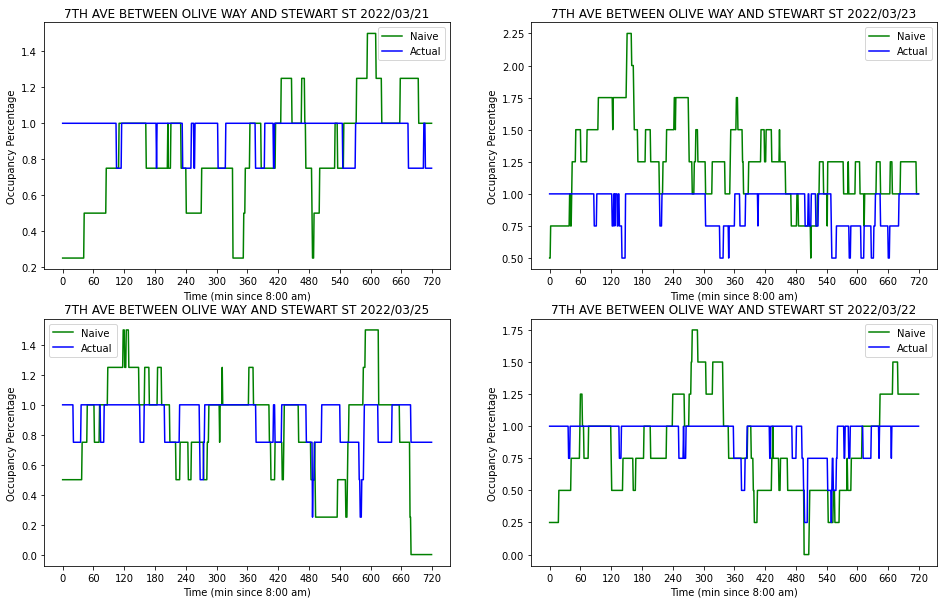

In [142]:
corr5_x = blocks_X[5]
corr5_y = blocks_Y[5]
corr5_name = block_names[5]
display(corr5_x, corr5_y, corr5_name)

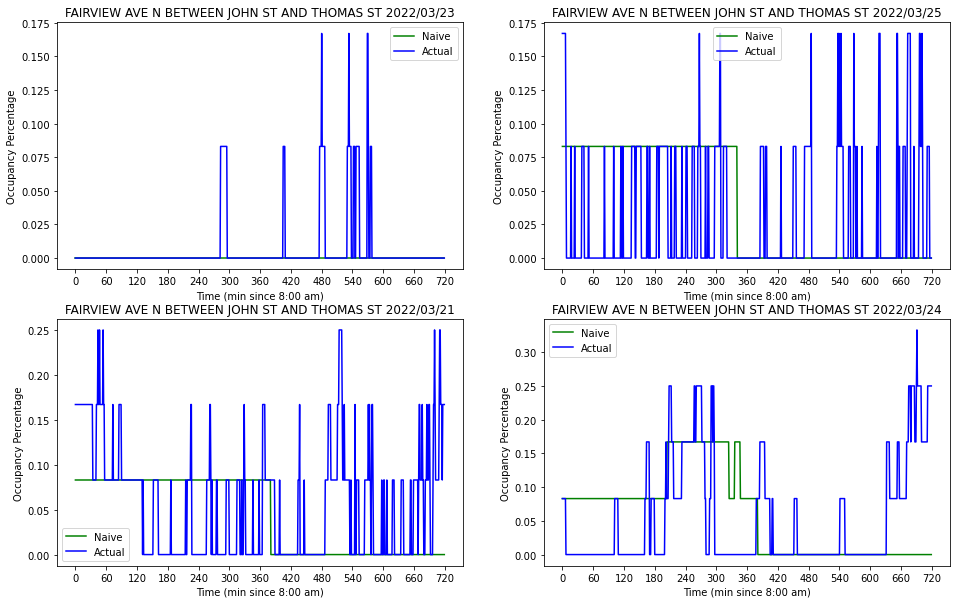

In [30]:
corr6_x = blocks_X[8]
corr6_y = blocks_Y[8]
corr6_name = block_names[8]
display(corr6_x, corr6_y, corr6_name)

## Ridge Regression with Gaussian Kernel

In [604]:
rand = random.randrange(100)
print(rand)

39


In [671]:
reg_error = []

### Correlated Block 1

In [672]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(corr1_x, corr1_y, test_size=0.10, random_state=rand)

In [673]:
lambda_val = 0.1
gamma = 0.01

rrg1 = kernel_ridge.KernelRidge(alpha=lambda_val, kernel='rbf', gamma=gamma)
rrg1.fit(x_train1, y_train1)
y_predicted = rrg1.predict(x_test1)

In [674]:
n = len(y_train1)
error = 0
naive_error = 0
for i in range(n):
    error += np.mean(np.abs(y_test1-y_predicted))
    naive_error += np.mean(np.abs(y_test1-x_test1))
print("Prediction Error: ")
print(error/n)
reg_error.append(error/n)
print("Naive Error: ")
print(naive_error/n)

Prediction Error: 
0.05047277800767603
Naive Error: 
0.23520601851851847


### Correlated Block 2

In [675]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(corr2_x, corr2_y, test_size=0.10, random_state=rand)

In [676]:
lambda_val = 0.01
gamma = 0.001

rrg2 = kernel_ridge.KernelRidge(alpha=lambda_val, kernel='rbf', gamma=gamma)
rrg2.fit(x_train2, y_train2)
y_predicted = rrg2.predict(x_test2)

In [677]:
n = len(y_train2)
error = 0
naive_error = 0
for i in range(n):
    error += np.mean(np.abs(y_test2-y_predicted))
    naive_error += np.mean(np.abs(y_test2-x_test2))
print("Prediction Error: ")
print(error/n)
reg_error.append(error/n)
print("Naive Error: ")
print(naive_error/n)

Prediction Error: 
0.13848467162046468
Naive Error: 
0.21780833333333327


### Correlated Block 3

In [678]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(corr3_x, corr3_y, test_size=0.10, random_state=rand)

In [679]:
lambda_val = 0.1
gamma = 0.001

rrg3 = kernel_ridge.KernelRidge(alpha=lambda_val, kernel='rbf', gamma=gamma)
rrg3.fit(x_train3, y_train3)
y_predicted = rrg3.predict(x_test3)

In [680]:
n = len(y_train3)
error = 0
naive_error = 0
for i in range(n):
    error += np.mean(np.abs(y_test3-y_predicted))
    naive_error += np.mean(np.abs(y_test3-x_test3))
print("Prediction Error: ")
print(error/n)
reg_error.append(error/n)
print("Naive Error: ")
print(naive_error/n)

Prediction Error: 
0.12974895128856864
Naive Error: 
0.59925


### Correlated Block 4

In [681]:
x_train4, x_test4, y_train4, y_test4 = train_test_split(corr4_x, corr4_y, test_size=0.10, random_state=rand)

In [682]:
lambda_val = 0.1
gamma = 0.0001

rrg4 = kernel_ridge.KernelRidge(alpha=lambda_val, kernel='rbf', gamma=gamma)
rrg4.fit(x_train4, y_train4)
y_predicted = rrg4.predict(x_test4)

In [683]:
n = len(y_train4)
error = 0
naive_error = 0
for i in range(n):
    error += np.mean(np.abs(y_test4-y_predicted))
    naive_error += np.mean(np.abs(y_test4-x_test4))
print("Prediction Error: ")
print(error/n)
reg_error.append(error/n)
print("Naive Error: ")
print(naive_error/n)

Prediction Error: 
0.09970943266213927
Naive Error: 
0.253535648148148


### Correlated Block 5

In [684]:
x_train5, x_test5, y_train5, y_test5 = train_test_split(corr5_x, corr5_y, test_size=0.10, random_state=rand)

In [685]:
lambda_val = 0.01
gamma = 0.001

rrg5 = kernel_ridge.KernelRidge(alpha=lambda_val, kernel='rbf', gamma=gamma)
rrg5.fit(x_train5, y_train5)
y_predicted = rrg5.predict(x_test5)

In [686]:
n = len(y_train5)
error = 0
naive_error = 0
for i in range(n):
    error += np.mean(np.abs(y_test5-y_predicted))
    naive_error += np.mean(np.abs(y_test5-x_test5))
print("Prediction Error: ")
print(error/n)
reg_error.append(error/n)
print("Naive Error: ")
print(naive_error/n)

Prediction Error: 
0.10335745822036224
Naive Error: 
0.26458333333333334


### Correlated Block 6

In [687]:
x_train6, x_test6, y_train6, y_test6 = train_test_split(corr6_x, corr6_y, test_size=0.10, random_state=rand)

In [688]:
lambda_val = 0.01
gamma = 0.001

rrg6 = kernel_ridge.KernelRidge(alpha=lambda_val, kernel='rbf', gamma=gamma)
rrg6.fit(x_train6, y_train6)
y_predicted = rrg6.predict(x_test6)

In [689]:
n = len(y_train6)
error = 0
naive_error = 0
for i in range(n):
    error += np.mean(np.abs(y_test6-y_predicted))
    naive_error += np.mean(np.abs(y_test6-x_test6))
print("Prediction Error: ")
print(error/n)
reg_error.append(error/n)
print("Naive Error: ")
print(naive_error/n)

Prediction Error: 
0.04737343237732521
Naive Error: 
0.04130972222222223


## Classification

In [623]:
mt = len(x_test1) + len(x_test2) + len(x_test3) + len(x_test4) + len(x_test5) + len(x_test6) 

### Correlated Block 1

In [624]:
n = len(x_train1)
nt = len(x_test1)
m = 84 - n - mt

one = np.ones(n)
zero = -1*np.ones(m)
onet = np.ones(nt)
zerot = -1*np.ones(mt-nt)

In [625]:
yb1_train = np.concatenate((one, zero))
xb1_train = np.vstack((x_train1, x_train2, x_train3, x_train4, x_train5, x_train6))

In [626]:
yb1_test = np.concatenate((onet, zerot))
xb1_test = np.vstack((x_test1, x_test2, x_test3, x_test4, x_test5, x_test6))

### Correlated Block 2

In [627]:
n = len(x_train2)
nt = len(x_test2)
m = 84 - n - mt

one = np.ones(n)
zero = -1*np.ones(m)
onet = np.ones(nt)
zerot = -1*np.ones(mt-nt)

In [628]:
yb2_train = np.concatenate((one, zero))
xb2_train = np.vstack((x_train2, x_train1, x_train3, x_train4, x_train5, x_train6))

In [629]:
yb2_test = np.concatenate((onet, zerot))
xb2_test = np.vstack((x_test2, x_test1, x_test3, x_test4, x_test5, x_test6))

### Correlated Block 3

In [630]:
n = len(x_train3)
nt = len(x_test3)
m = 84 - n - mt

one = np.ones(n)
zero = -1*np.ones(m)
onet = np.ones(nt)
zerot = -1*np.ones(mt-nt)

In [631]:
yb3_train = np.concatenate((one, zero))
print(yb3_train.shape)
xb3_train = np.vstack((x_train3, x_train1, x_train2, x_train4, x_train5, x_train6))

(72,)


In [632]:
yb3_test = np.concatenate((onet, zerot))
xb3_test = np.vstack((x_test3, x_test1, x_test2, x_test4, x_test5, x_test6))

### Correlated Block 4

In [633]:
n = len(x_train4)
nt = len(x_test4)
m = 84 - n - mt

one = np.ones(n)
zero = -1*np.ones(m)
onet = np.ones(nt)
zerot = -1*np.ones(mt-nt)

In [634]:
yb4_train = np.concatenate((one, zero))
xb4_train = np.vstack((x_train4, x_train1, x_train2, x_train3, x_train5, x_train6))

In [635]:
yb4_test = np.concatenate((onet, zerot))
xb4_test = np.vstack((x_test4, x_test1, x_test2, x_test3, x_test5, x_test6))

### Correlated Block 5

In [636]:
n = len(x_train5)
nt = len(x_test5)
m = 84 - n - mt

one = np.ones(n)
zero = -1*np.ones(m)
onet = np.ones(nt)
zerot = -1*np.ones(mt-nt)

In [637]:
yb5_train = np.concatenate((one, zero))
xb5_train = np.vstack((x_train5, x_train1, x_train2, x_train3, x_train4, x_train6))

In [638]:
yb5_test = np.concatenate((onet, zerot))
xb5_test = np.vstack((x_test5, x_test1, x_test2, x_test3, x_test4, x_test6))

### Correlated Block 6

In [639]:
n = len(x_train6)
nt = len(x_test6)
m = 84 - n - mt

one = np.ones(n)
zero = -1*np.ones(m)
onet = np.ones(nt)
zerot = -1*np.ones(mt-nt)

In [640]:
yb6_train = np.concatenate((one, zero))
xb6_train = np.vstack((x_train6, x_train1, x_train2, x_train3, x_train4, x_train5))

In [641]:
yb6_test = np.concatenate((onet, zerot))
xb6_test = np.vstack((x_test6, x_test1, x_test2, x_test3, x_test4, x_test5))
print(yb1_test)

[ 1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]


In [642]:
lambda_val = 0.1
gamma = 0.01

In [643]:
rgc1 = kernel_ridge.KernelRidge(alpha=lambda_val, kernel='rbf', gamma=gamma)
rgc1.fit(xb1_train, yb1_train)

KernelRidge(alpha=0.1, gamma=0.01, kernel='rbf')

In [644]:
rgc2 = kernel_ridge.KernelRidge(alpha=lambda_val, kernel='rbf', gamma=gamma)
rgc2.fit(xb2_train, yb2_train)

KernelRidge(alpha=0.1, gamma=0.01, kernel='rbf')

In [645]:
rgc3 = kernel_ridge.KernelRidge(alpha=lambda_val, kernel='rbf', gamma=gamma)
rgc3.fit(xb3_train, yb3_train)

KernelRidge(alpha=0.1, gamma=0.01, kernel='rbf')

In [646]:
rgc4 = kernel_ridge.KernelRidge(alpha=lambda_val, kernel='rbf', gamma=gamma)
rgc4.fit(xb4_train, yb4_train)

KernelRidge(alpha=0.1, gamma=0.01, kernel='rbf')

In [647]:
rgc5 = kernel_ridge.KernelRidge(alpha=lambda_val, kernel='rbf', gamma=gamma)
rgc5.fit(xb5_train, yb5_train)

KernelRidge(alpha=0.1, gamma=0.01, kernel='rbf')

In [648]:
rgc6 = kernel_ridge.KernelRidge(alpha=lambda_val, kernel='rbf', gamma=gamma)
rgc6.fit(xb6_train, yb6_train)

KernelRidge(alpha=0.1, gamma=0.01, kernel='rbf')

In [649]:
def predict_occ(x_test, rrg, rgc, tol):
    prediction = np.zeros((x_test.shape))
    x = x_test.reshape(1,-1)
    scale = []
    index = []
    for i in range(6):
        scale.append(logistic.cdf(rgc[i].predict(x))[0])

    largest = np.amax(scale)
    
    for i in range(6):
        diff = np.abs(largest - scale[i])
        if (diff < tol):
            index.append(i)
    
    for i in index:
        prediction += rrg[i].predict(x)[0]
    print(index)
    print(scale)
    return prediction/len(index)

In [650]:
rrg = [rrg1, rrg2, rrg3, rrg4, rrg5, rrg6]
rgc = [rgc1, rgc2, rgc3, rgc4, rgc5, rgc6]

In [651]:
s = len(xb1_test)
yb_test = np.vstack((y_test1, y_test2, y_test3, y_test4, y_test5, y_test6))

In [652]:
prediction = []
for i in range(s):
    prediction.append(predict_occ(xb1_test[i], rrg, rgc, 0.1))

[0]
[0.689456338116594, 0.3114147546697864, 0.2689571666194091, 0.26817862229946177, 0.26669701776631555, 0.2645878022285626]
[0]
[0.7279009720810804, 0.26975877758162625, 0.28667256726100676, 0.2851804541525025, 0.2882907925784243, 0.28685089525533053]
[0]
[0.7149264003285637, 0.28062237498671333, 0.27323419776434693, 0.2778052323892851, 0.2694575671487366, 0.2724776954418819]
[1]
[0.2447223225405555, 0.7529248983899834, 0.26398605223118227, 0.25933119943099814, 0.25369830169121704, 0.26495704154017763]
[1]
[0.30424581207055656, 0.7052700271887525, 0.2667535276745349, 0.28539750665303193, 0.25708327203695186, 0.2574216785012974]
[1]
[0.2992049417927849, 0.6467680860055286, 0.2624575336736311, 0.29317242571104263, 0.27121034806029026, 0.30741135345546056]
[2]
[0.35768410346037466, 0.2530570626909611, 0.6307795048667763, 0.27920181860276033, 0.25835649605450217, 0.25885906150294824]
[3]
[0.20006108036941594, 0.3004359768780634, 0.2730216482967846, 0.68332160857692, 0.30676471164999564, 

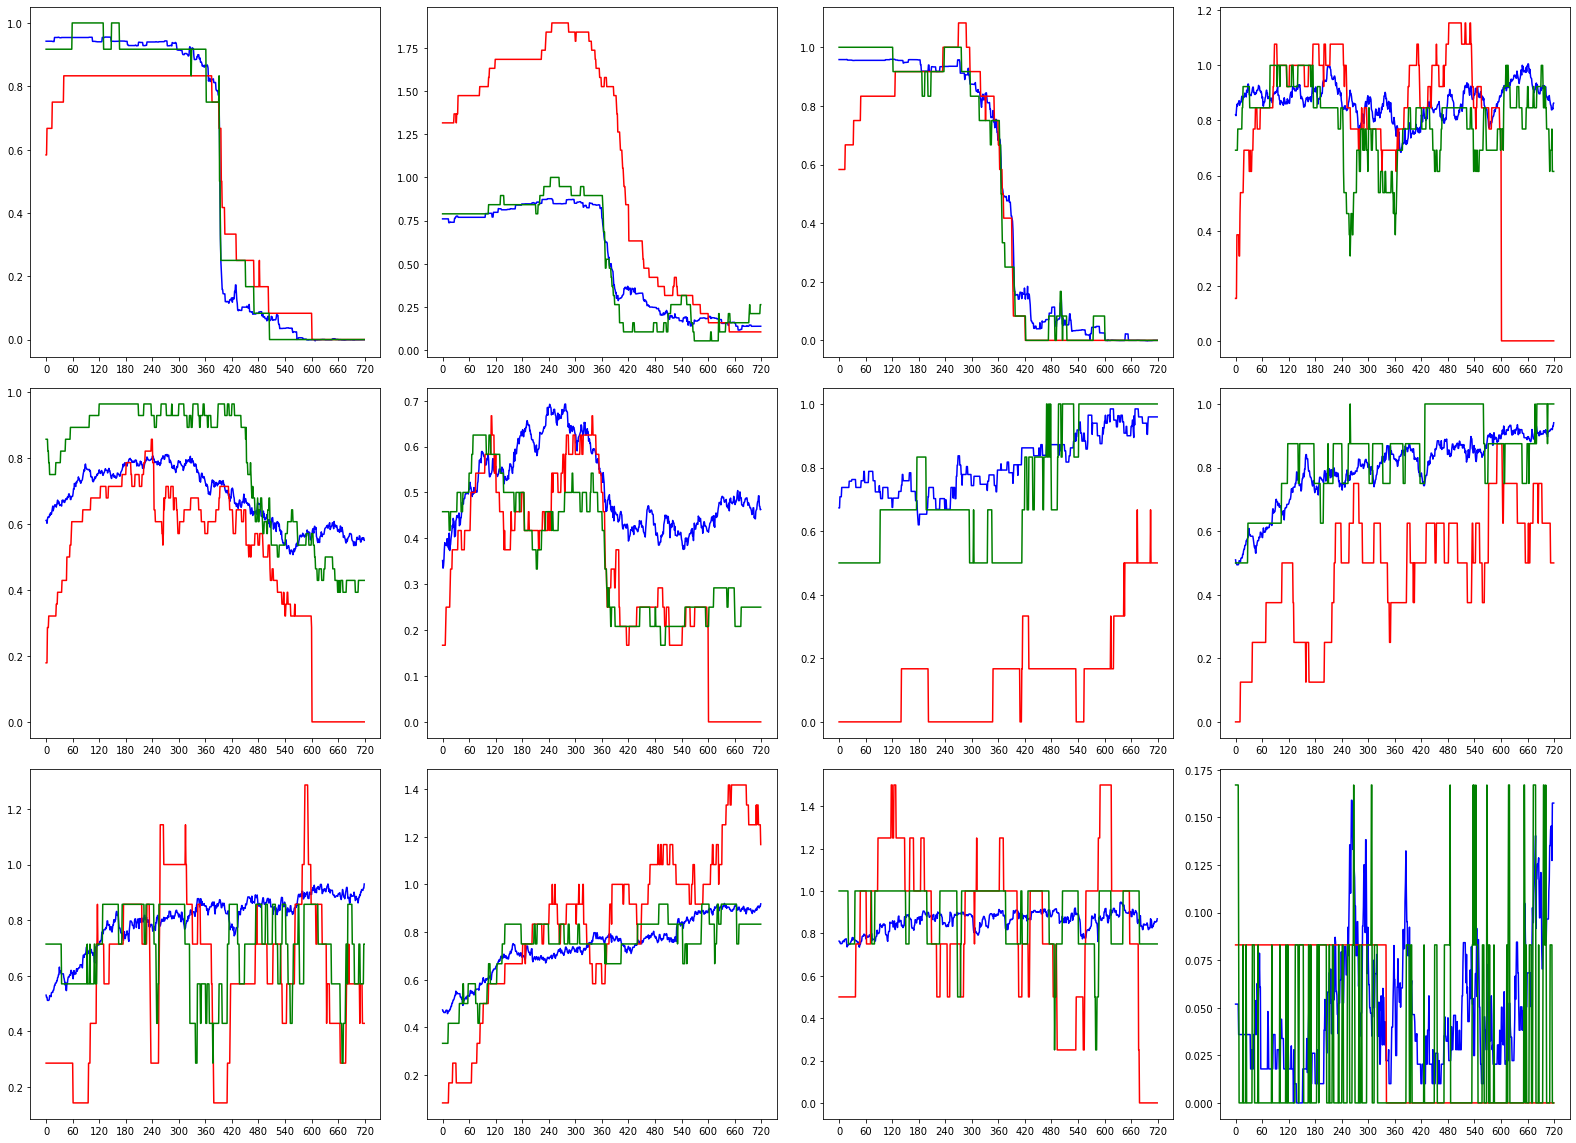

Prediction Error: 
0.09860872550167628
Naive Error: 
0.252066087962963


In [653]:
plt.figure(figsize=(22,16))
error = 0
naive_error = 0
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.plot(time, prediction[i], color='b')
    plt.plot(time, xb1_test[i], color='r')
    plt.plot(time, yb_test[i], color='g')
    plt.xticks(np.arange(0,780,60))
    error += np.mean(np.abs(yb_test[i]-prediction[i]))
    naive_error += np.mean(np.abs(yb_test[i]-xb1_test[i]))

plt.tight_layout()
plt.show()
print("Prediction Error: ")
print(error/12)
print("Naive Error: ")
print(naive_error/12)

In [690]:
print("Regular Ridge Regression Error:")
print(reg_error)
print(np.mean(reg_error))

Regular Ridge Regression Error:
[0.05047277800767603, 0.13848467162046468, 0.12974895128856864, 0.09970943266213927, 0.10335745822036224, 0.04737343237732521]
0.094857787362756
